<a href="https://colab.research.google.com/github/Sptfff/ADA-Informes/blob/main/Informe6_Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de selección
**Entrada:** Conjunto de números $A = [a_1,a_2,a_3,...,a_n]$ y un índice $k$

**Salida:** Valor $n$, que es mayor a $i-1$ elementos de $A$


-----

![image.png](https://imgur.com/8gorIah.jpg)

-----
Los problemas de selección suelen ser algo simple de resolver, pero esto no aplica a la hora de implementarlo en un algoritmo, ni mucho menos si se trata de que se haga de la manera más eficiente. Aunque para esto surgen distintos algoritmos, como el que veremos a continuación.

#2. Descripción del Algoritmo Select

Select fracciona el arreglo recibido para encontrar el n-ésimo elemento más pequeño, para fraccionar el arreglo hace lo siguiente:

1. Un algoritmo con el que se puede "comparar" este algoritmo es con *Quick Sort* ya que ambos hacen uso de la función *partition*, por lo que ambos dependen tanto de una función externa como del tiempo de ejecución de la misma.

2. Similar al punto anterior, tambien similitud con *Bucket Sort*, ya que ambos algortimos llaman a una función auxiliar, en este caso esa función es *Insertion Sort*, por lo que "dependen" de la efectividad de esta función, por lo que ambos algoritmos "dividen" el arreglo recibido en sub-arreglos de menor tamaño, para evitar que *Insertion Sort* haga un número demasiado grande de comparaciones.

#Código

In [109]:
import random
from termcolor import colored


def insertionSort(arr, cont, verbose = True):

  for i in range(0, len(arr) ):
    aux = arr[i]
    j = i-1
    while j >= inicio and aux < arr[j] :
        cont[0] += 1
        arr[j+1] = arr[j]
        j -= 1
        arr[j+1] = aux

  return arr

def partition(arr, l, r, cont, verbose = True):

    x = pivotSelection(arr,l,r, cont, verbose)

    i = l
    for j in range(l, r):
        cont[0]+=1
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
              
    arr[i], arr[r] = arr[r], arr[i]
    return i

def pivotSelection(arr, izq, der, cont, verbose = True):

    auxArr = arr #Arreglo auxiliar para no alterar el orden del arreglo original

    cont[0] += 1
    if der-izq <= 5:     #Si el arreglo tiene 5 o menos elementos, no hace falta dividirlo 
      insertionSort(auxArr,cont) #Luego de ordenar, la mediana será el valor del medio
      if(verbose):
        print(colored(f"El largo del arreglo es menor o igual a 5", "red"))
        print(colored(f"Mediana: {auxArr[round((der-izq)/2)]}", "green"))
      return auxArr[round((der-izq)/2)]

    medianas = []


    #Se crean n/5 subarreglos 
    for i in range(izq, der, 5):
      subDer = i+4
      cont[0]+=1
      if(subDer > der):
        subDer = der

      subArr = arr[:subDer+1]
      subArr = subArr[i:]
      #print(subArr)
      insertionSort(subArr,cont)    
      #Se guarda la mediana en un arreglo de medianas
      if(verbose == True):
        print(colored(f"La mediana del sub-arreglo", "green"), colored(f"{subArr}", "blue"), colored(f" es:", "green"), colored(f" {subArr[round(len(subArr)/2)]}", "blue"))
      medianas.append(subArr[round(len(subArr)/2)])
    if verbose:
      print(colored(f"\nArreglo de medianas: {medianas}", "green"))
    #Se llama recursivamente a esta función pasandole el arreglo de medianas
    return pivotSelection(medianas, 0, len(medianas), cont, verbose)



def select(arr, l, r, k, cont, verbose = True):
  
    if (k > 0 and k <= r - l + 1): #Comprobar validez de la entrada
        cont[0]+=1
        if(verbose == True):
          print(colored(f"El valor que se busca es: {key}", "green"))
          print(colored(f"El arreglo se pasa Partition\n", "yellow"))
        index = partition(arr, l, r, cont, verbose) #Se divide el arreglo

        if(verbose == True):
          print(colored(f"\nEl indice obtenido es: {index}", "yellow"))
          print(colored(f"Arreglo luego de partition {arr}\n", "blue"))

        if (index - l == k - 1): #Si el index es igual al valor ingresado, en esta posición se encuentra el número
            cont[0]+=1
            if(verbose == True):
              print(colored(f"El indice es igual al valor que se busca {arr[index]}", "green"))
            return arr[index]
        #Se llama de manera recursiva a la función select con la mitad identificada
        if (index - l > k - 1):
            cont[0]+=1
            if(verbose):
               print(colored(f"Se busca en la mitad: {arr[:index]}", "red"))

            return select(arr, l, index - 1, k, cont, verbose)

        if(verbose):
               print(colored(f"Se busca en la mitad: {arr[index:]}", "red"))

        return select(arr, index + 1, r, k - index + l - 1, cont, verbose)
        
    else: 
      print(colored(f"ERROR", "red"))

n = random.randint(10,30)
arr = random.sample(range(-50, 100), n)
#arr = [7, 4, 9, 2, 11, 1, 3, 19, 8]
print(colored(f"Arreglo recibido: {arr}\n", "magenta"))
inicio = 0; limit = 1; key = 3
cont = [0]
k_esimo = select(arr, inicio, len(arr)-1, key, cont, False)
print(colored(f"\nArreglo: {arr}", "green"))
print(colored(f"3° valor más pequeño: {k_esimo}\t Contador: {cont}", "green"))

Arreglo recibido: [31, 24, 64, 52, 60, -11, -5, -10, 46, -7, 17]


Arreglo: [-11, -10, -7, -5, 17, 24, 31, 46, 52, 60, 64]
3° valor más pequeño: -7	 Contador: [77]


##Ejecución paso a paso (verbose = True)

In [114]:
n = random.randint(1,37)
arr = random.sample(range(-50, 100), n)
print(colored(f"Arreglo recibido: {arr}\n", "magenta"))
cont = [0]
k_esimo = select(arr, inicio, len(arr)-1, key, cont, True)
print(colored(f"\nArreglo: {arr}", "green"))
print(colored(f"3° valor más pequeño: {k_esimo}\t Contador: {cont}", "green"))

Arreglo recibido: [-33, 13, -16, -50, 80, -29, 95, 67, 83, 19, 53, 47, 60, 57, -49]

El valor que se busca es: 3
El arreglo se pasa Partition

La mediana del sub-arreglo [-50, -33, -16, 13, 80]  es:  -16
La mediana del sub-arreglo [-29, 19, 67, 83, 95]  es:  67
La mediana del sub-arreglo [-49, 47, 53, 57, 60]  es:  53

Arreglo de medianas: [-16, 67, 53]
El largo del arreglo es menor o igual a 5
Mediana: 67

El indice obtenido es: 11
Arreglo luego de partition [-33, 13, -16, -50, -29, 67, 19, 53, 47, 60, 57, -49, 95, 80, 83]

Se busca en la mitad: [-33, 13, -16, -50, -29, 67, 19, 53, 47, 60, 57]
El valor que se busca es: 3
El arreglo se pasa Partition

La mediana del sub-arreglo [-50, -33, -29, -16, 13]  es:  -29
La mediana del sub-arreglo [19, 47, 53, 60, 67]  es:  53

Arreglo de medianas: [-29, 53]
El largo del arreglo es menor o igual a 5
Mediana: 53

El indice obtenido es: 8
Arreglo luego de partition [-33, 13, -16, -50, -29, 19, 53, 47, 57, 60, 67, -49, 95, 80, 83]

Se busca en la 

#Correctitud

Select encuentra el n-ésimo elementos menor de un arreglo  de largo $k$, siempre que n <= k.

Dado que Select es una función recursiva utilizaremos inducción matemática:

    Se asume que Insertion, Partition y PivotSelect son correctos.

> Caso base (k = 1): En este caso solo existe un elemento en el arreglo, por lo que este es el n-ésimo menor elemento. 

> Caso general: Si luego de obtener la mediana de las medianas, esta no es el n-ésimo valor buscado, entonces: 
Se aplica este valor como pivote en la función partition. Por lo que el arreglo queda en 2 partes, la izquierda siendo los elementos menores al pivote, mientras que los de la derecha, los mayores.
Después se comprobará si el pivote es menor o mayor al n-ésimo elemento, si es menor se comprobarán los valores que se encuentran en la derecha del arreglo, en caso contrario se buscaran en el sector izquierdo.
> Después de identificar la mitad correcto, se "enviará" esa mitad a Select nuevamente, hasta llegar al caso base, y dado que este se tomo como correcto, significa que el caso general también lo es.


#Tiempo de ejecución

Para calcular el tiempo de ejecución de *Select* primero se debe de estimar el tiempo adicional que tendrá ya que esta llama a funciones auxiliares, las cuales son:

> PivotSelect: Esta función divide el arreglo en sub-arreglos de 5 elementos ($n\frac 5$ sub-arreglos), luego llama a la función *Insertion Sort* para que ordene cada sub-arreglo y obtener su mediana, agregando esta a un arreglo de mediana. Una vez completado este arreglo se llama a pivotSelect (lo que hace que esta función sea recursiva). Todos esto con tal de encontrar un buen pivote (una elemento casi central del arreglo recibido). Todo el proceso (excluyendo a *Insertion Sort*) posee una complejidad de $O(n)$.

> Insertion Sort: Este posee una complejidad de $O(n)$ en su caso promedio, mientras que en el peor posee una complejidad de $O(n^2)$.

Buscar la mediana tiene complejidad lineal, por lo no afecta en gran medida la complejidad de Pivot Select.

$T(n) = T(\frac n 5 ) O(n)$

Usando el Teorema maestro.
a = 1; b = 5; c = 1.

 $a < b^c -> 1 < 5^1$.

Eso signfica que la complejidad queda como $O(n^c) = O(n^1) = O(n)$.

> Partition: Posee una complejidad de $O(n)$, esto de manera constante (sin alteraciones).

Finalizado el proceso anterior tenemos que PivotSelect posee una complejidad $O(n)$ mientras que Partition una de $O(n)$.

Dado que pivotSelect selecciona un elemento como pivote, luego Partition "verifica" si el pivote es el elemento buscado, en caso de que no sea así, llama a select con una de las mitades del arreglo donde podría estar el elemento.

En el peor caso, estas mitades estarían mal distribuidas, es decir que quedarían $\frac{3n} {10}$ elementos a una mitad y en la otra $\frac{7n}{10}$.

Probando con ambos casos:
> $\frac{7n}{10}$ -->  $T(n) = T(\frac{7n}{10}) + O(n) + O(n) = T(\frac{7n}{10}) + 2O(n)$.

Y aplicando propiedades de fracciones, podemos decir que $\frac{7n}{10} = \frac{n}{\frac{10}{7}}$.

lo que queda como:
$T(n) = T(\frac{n}{\frac{10}{7}}) + 2O(n)$.

Y aplicando teorema maestro con: $a =1; b = \frac{7n}{10}; c = 1$.

$a < b^c -> 1 < \frac{7n}{10}$

Lo que significa que el algoritmo en este caso posee complejidad $O(n^c) = O(n)$.

Ahora probando con el otro caso

Con las complejidades de ambas fracciones podemos decir que la complejidad del algoritmo se encuentra entre estas 2, es decir:
> $\frac{3n}{10}$ -->  $T(n) = T(\frac{3n}{10}) + O(n) + O(n) = T(\frac{3n}{10}) + 2O(n)$.

Y aplicando propiedades de fracciones, podemos decir que $\frac{3n}{10} = \frac{n}{\frac{10}{3}}$.

lo que queda como:
$T(n) = T(\frac{n}{\frac{10}{3}}) + 2O(n)$.

Y aplicando teorema maestro con: $a =1; b = \frac{3n}{10}; c = 1$.

$a < b^c -> 1 < \frac{3n}{10}$

Lo que significa que el algoritmo en este caso posee complejidad $O(n^c) = O(n)$.

$3n/10 <= complejidad Select <= 7n/10$

Lo que significa que el algoritmo Select posee una complejidad En su caso promedio de $O(n)$.


#Experimentación

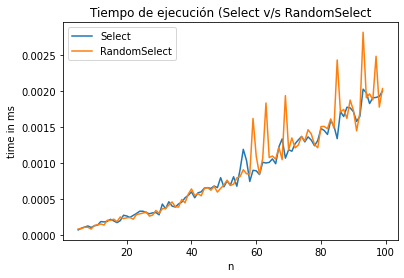

In [119]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

def partition(arr, l, r, cont, verbose = True):

    auxArr = arr[l:r+1]
    x = random.choice(auxArr)

    i = l
    for j in range(l, r):
        cont[0]+=1
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
              
    arr[i], arr[r] = arr[r], arr[i]

    return i
  
def RandomSelect(arr, l, r, k, cont, verbose = True):
  
    if (k > 0 and k <= r - l + 1): #Comprobar validez de la entrada
        cont[0]+=1
  
        index = partition(arr, l, r, cont, verbose) #Se divide el arreglo

        if verbose:
          print("\nArreglo:", arr[l:r+1])
          print("Indice encontrado:",index)

        if (index - l == k - 1): #Si el index es igual al valor ingresado, en esta posición se encuentra el número
            cont[0]+=1
            if verbose:
              print("El indice es igual al limite derecho")

            return arr[index]
  
        #Se llama de manera recursiva a la función select con la mitad identificada
        if (index - l > k - 1):
            cont[0]+=1
            if(verbose):
              print("Mitad que contiene el valor", arr[:index])

            return RandomSelect(arr, l, index - 1, k, cont, verbose)

        if(verbose):
              print("Mitad que contiene el valor", arr[index:])

        return RandomSelect(arr, index + 1, r, k - index + l - 1, cont, verbose)
        
    else: 
      print("Entrada invalida")

x=[]; y=[]; x2=[]; y2=[]; cont = [0]

for n in range(5,100):
  nums = []
  nums2 = []

  for i in range(0,n):
    
    a = random.sample(range(1, 1000), n)
    nums.append(a)
    nums2.append(a)
    
  k = random.randrange(1,len(nums)-1)
  t = repeat(setup="from __main__ import select", stmt=f"select({nums},{0}, {len(nums)-1},{k}, {cont}, {False})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import RandomSelect", stmt=f"RandomSelect({nums2},{0}, {len(nums2)-1},{k}, {cont}, {False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  x2.append(n)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x2,y2)
plt.title("Tiempo de ejecución (Select v/s RandomSelect")
plt.legend(["Select","RandomSelect"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

En el gráfico se puede ver de que ambos algoritmos presentan un tiempo de ejecución similar. Aunque esto pueda parece contra-intuitivo, debido a que uno elige el pivote de forma aleatoria, las verdaderas posibilidades de que ocurra el caso de que el pivote sea desbalanceado son mucho más pequeñas de lo que podría llegar a parecer.

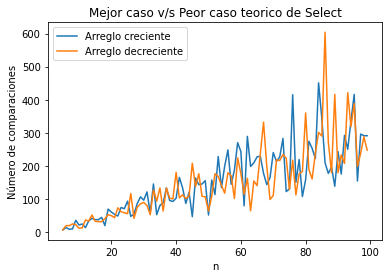

In [126]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(5,100)] 
y=[]; y2=[]; cont=[0]; cont2=[0]

for n in range(5,100):

  b = [n for n in range(0,n)]
  k = random.randrange(1,len(b)-1)
  counter = select(b, 0, len(b)-1, k,cont,False)
  y.append(cont[0])
  cont[0] = 0

  c = [n for n in range(n,0,-1)]
  k = random.randrange(1,len(c)-1)
  counter = select(b, 0, len(c)-1, k,cont2,False)
  y2.append(cont2[0])
  cont2[0] = 0


plt.plot(x,y)
plt.plot(x,y2)
plt.title("Mejor caso v/s Peor caso teorico de Select")
plt.legend(["Arreglo creciente", "Arreglo decreciente"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

En el gráfico se ve el número de comparaciones entre el mejor y el peor caso de Select, aunque en realidad esas variaciones que se ven se deben principalmente a las funciones auxiliares, como lo son Insertion Sort y Partition, ya que depende del caso que reciban estas se pueden disparar el número de comparaciones, sobre todo teniendo en consideración que el peor caso de Insertion Sort es similar a un mal caso de Partition.